b0:be:83:32:21:c0


/opt/anaconda3/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'air' has multiple fill values {-99, 32767}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


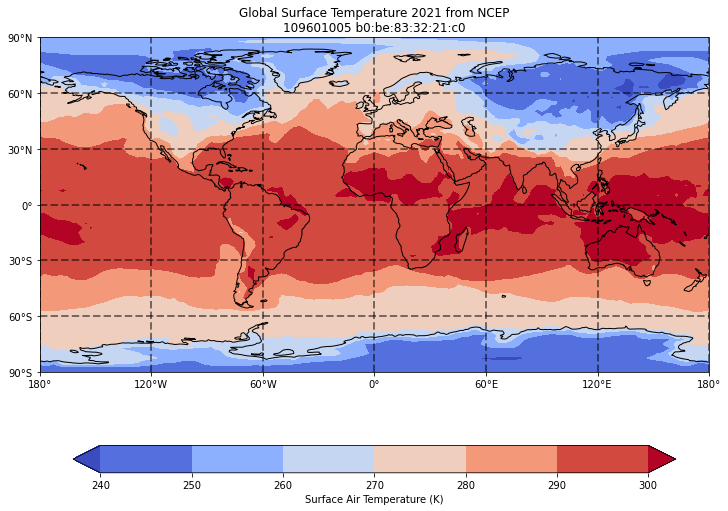

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

from getmac import get_mac_address as gma
mac = gma()
print(mac)
ds = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.sfc.2021.nc')

lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
#print (lons)
time = ds.variables['time'][:]
temp = ds.variables['air'][:]

temp, lons = add_cyclic_point(temp, coord=ds['lon'])

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection=ccrs.PlateCarree())

cs = ax.contourf(lons, lats, temp[0, :, :], 
                 transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend  = 'both')

# Add coastlines;
ax.coastlines()

# Add gridlines;
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')

gl.xlines = True
gl.ylines = True

# Define the xticks for Longitudes;
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for Latitudes;

ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add color bar;
cbar = plt.colorbar(cs, shrink=0.9, orientation='horizontal', label = 'Surface Air Temperature (K)')

# Add figure title;
plt.title('Global Surface Temperature 2021 from NCEP\n109601005 '+mac)
fig.savefig('ttrobinson.png', dpi=300)

plt.show()